# Bibertomograph

## File I/O
read the file vairables and declare them test phase only for the first file

In [1]:
def read_tomograph(filename):
    with open(filename, "r") as f:
        lines = [line.strip() for line in f.readlines() if line.strip()]
    
    n = int(lines[0])  # Größe n x n
    cols = list(map(int, lines[1].split()))
    rows = list(map(int, lines[2].split()))
    blue_diagonals = list(map(int, lines[3].split()))
    yellow_diagonals = list(map(int, lines[4].split()))
    
    return n, cols, rows, blue_diagonals, yellow_diagonals

size, cols, rows, blue_diagonals, yellow_diagonals = read_tomograph(r"eingaben\tomograph00.txt")

## Rules for filling
- wenn 0 alle felder streichen
- wenn horizontal oder veritkal so gross wie breite des quadrats alle fuellen
- Wenn ein Row oder Column mit 1 schon einen hat, dann streichen wir den Rest
- Wenn in einer Diagonal, Row oder Column nur die anzahl der Sichtbaren frei ist, dann diese füllen

### check for 0
#### diagonals: 
For an 𝑛 × 𝑛 grid:
- Diagonal index d runs from 0 to 2n-2
- The main diagonal (center) corresponds to d = n - 1
- The mathematical condition for blue diagonals: i−j=d−(n−1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def blue_diagonal_positions(diagonal_index):
    positions = []
    if diagonal_index < size:
        for i in range(diagonal_index):
            positions.append((i, diagonal_index-i))
    else:
        for i in range(2*size - diagonal_index - 1):
            positions.append((diagonal_index - size + i + 1, size - i - 1))
    return positions

def yellow_diagonal_positions(diagonal_index):
    positions = []
    if diagonal_index < size:
        for i in range(diagonal_index + 1):
            positions.append((size - diagonal_index - i -1, size - i))
    else:
        for i in range(2*size - diagonal_index - 1):
            positions.append((size - i - 1, diagonal_index - size + i + 1))
    return positions



grid = np.zeros((size, size), dtype=int)

# check columns and rows for 0
for j, col in enumerate(cols):  
    if col == 0:
        grid[:, j] = -1  

for i, row in enumerate(rows):
    if row == 0:
        grid[i, :] = -1

# check diagonals for 0
for d, diagonal in enumerate(blue_diagonals):
    if diagonal == 0:
        for i, j in blue_diagonal_positions(d):
            grid[i, j] = -1

# index out of range :/
#for d, diagonal in enumerate(yellow_diagonals):
#    if diagonal == 0:
#        for i, j in yellow_diagonal_positions(d):
#            grid[i, j] = -1

# show grid
plt.imshow(grid, cmap="gray", interpolation="nearest")
plt.show()


IndexError: index 8 is out of bounds for axis 1 with size 8

### check for filled rows/columns/diagonals
if the amount of 0 in the row/column/diagonal equals the lengt of the element minus the amount of -1 in the element fill every field

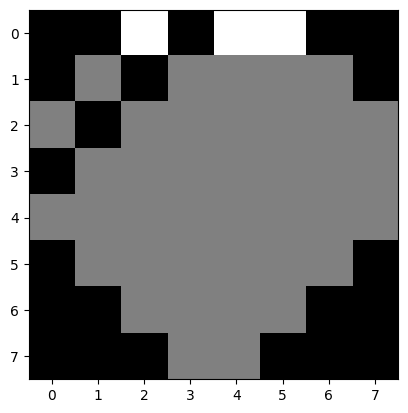

In [12]:
# check columns and rows for full
import math as m
for i, col in enumerate(cols):  
    filled = np.sum(grid[:, i] == 1)
    blocked = np.sum(grid[:, i] == -1)
    if filled == col:
        grid[grid[:, i] == 0, i] = -1
    elif blocked == size - col:
        grid[grid[:, i] == 0, i] = 1

for j, row in enumerate(rows):  
    filled = np.sum(grid[j, :] == 1)
    blocked = np.sum(grid[j, :] == -1)
    if filled == row:
        grid[j, grid[j, :] == 0] = -1
    elif blocked == size - row:
        grid[j, grid[j, :] == 0] = 1

# check diagonals for only 1 needed
for d, diagonal in enumerate(blue_diagonals):
    size_of_diagonal = d + 1 if d < size else 2 * size - d -1
    current = [np.sum(grid[i, j] == 1) for i in range(size) for j in range(size) if i - j == d - (size - 1)]
    if diagonal == size_of_diagonal + np.sum(current):
        for i in range(size):
            for j in range(size):
                if i - j == d - (size - 1) and grid[i, j] == 0:
                    grid[i, j] = 1
    # if diagonal equals negative of current, all others are blocked
    elif diagonal == -np.sum(current):
        for i in range(size):
            for j in range(size):
                if i - j == d - (size - 1) and grid[i, j] == 0:
                    grid[i, j] = -1

# check diagonals for only 1 needed
for d, diagonal in enumerate(yellow_diagonals):
    size_of_diagonal = d + 1 if d < size else 2 * size - d -1
    current = [np.sum(grid[i, j] == 1) for i in range(size) for j in range(size) if i - j == d - (size - 1)]
    if diagonal == size_of_diagonal + np.sum(current):
        for i in range(size):
            for j in range(size):
                if i - j == d - (size - 1) and grid[i, j] == 0:
                    grid[i, j] = 1
    # if diagonal equals negative of current, all others are blocked
    elif diagonal == -np.sum(current):
        for i in range(size):
            for j in range(size):
                if i - j == d - (size - 1) and grid[i, j] == 0:
                    grid[i, j] = -1

# show grid
plt.imshow(grid, cmap="gray", interpolation="nearest")
plt.show()


# debugging

In [16]:
for i in range(2):
    print(i)

0
1
